## Matplotlib tutorial

#### Contour Plots 

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import LinearLocator, FormatStrFormatter

### The code from the matplotlib site

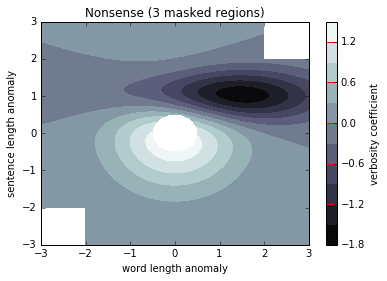

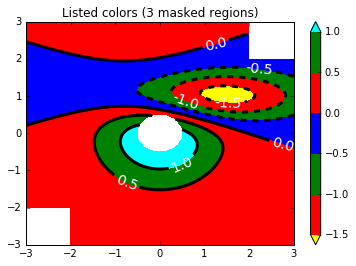

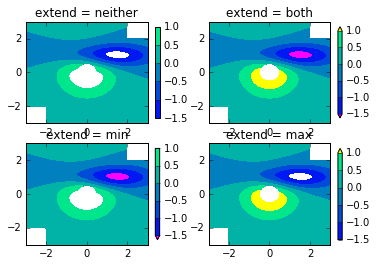

In [17]:
#!/usr/bin/env python
import numpy as np
import matplotlib.pyplot as plt

origin = 'lower'
#origin = 'upper'

delta = 0.025

x = y = np.arange(-3.0, 3.01, delta)
X, Y = np.meshgrid(x, y)
Z1 = plt.mlab.bivariate_normal(X, Y, 1.0, 1.0, 0.0, 0.0)
Z2 = plt.mlab.bivariate_normal(X, Y, 1.5, 0.5, 1, 1)
Z = 10 * (Z1 - Z2)

nr, nc = Z.shape

# put NaNs in one corner:
Z[-nr//6:, -nc//6:] = np.nan
# contourf will convert these to masked


Z = np.ma.array(Z)
# mask another corner:
Z[:nr//6, :nc//6] = np.ma.masked

# mask a circle in the middle:
interior = np.sqrt((X**2) + (Y**2)) < 0.5
Z[interior] = np.ma.masked


# We are using automatic selection of contour levels;
# this is usually not such a good idea, because they don't
# occur on nice boundaries, but we do it here for purposes
# of illustration.
CS = plt.contourf(X, Y, Z, 10,
                  #[-1, -0.1, 0, 0.1],
                  #alpha=0.5,
                  cmap=plt.cm.bone,
                  origin=origin)

# Note that in the following, we explicitly pass in a subset of
# the contour levels used for the filled contours.  Alternatively,
# We could pass in additional levels to provide extra resolution,
# or leave out the levels kwarg to use all of the original levels.

#CS2 = plt.contour(CS, levels=CS.levels[::2],
#                  colors='r',
#                  origin=origin,
#                  hold='on')

plt.title('Nonsense (3 masked regions)')
plt.xlabel('word length anomaly')
plt.ylabel('sentence length anomaly')

# Make a colorbar for the ContourSet returned by the contourf call.
cbar = plt.colorbar(CS)
cbar.ax.set_ylabel('verbosity coefficient')
# Add the contour line levels to the colorbar
cbar.add_lines(CS2)

plt.figure()

# Now make a contour plot with the levels specified,
# and with the colormap generated automatically from a list
# of colors.
levels = [-1.5, -1, -0.5, 0, 0.5, 1]
CS3 = plt.contourf(X, Y, Z, levels,
                   colors=('r', 'g', 'b'),
                   origin=origin,
                   extend='both')
# Our data range extends outside the range of levels; make
# data below the lowest contour level yellow, and above the
# highest level cyan:
CS3.cmap.set_under('yellow')
CS3.cmap.set_over('cyan')

CS4 = plt.contour(X, Y, Z, levels,
                  colors=('k',),
                  linewidths=(3,),
                  origin=origin)
plt.title('Listed colors (3 masked regions)')
plt.clabel(CS4, fmt='%2.1f', colors='w', fontsize=14)

# Notice that the colorbar command gets all the information it
# needs from the ContourSet object, CS3.
plt.colorbar(CS3)

# Illustrate all 4 possible "extend" settings:
extends = ["neither", "both", "min", "max"]
cmap = plt.cm.get_cmap("winter")
cmap.set_under("magenta")
cmap.set_over("yellow")
# Note: contouring simply excludes masked or nan regions, so
# instead of using the "bad" colormap value for them, it draws
# nothing at all in them.  Therefore the following would have
# no effect:
# cmap.set_bad("red")

fig, axs = plt.subplots(2, 2)
for ax, extend in zip(axs.ravel(), extends):
    cs = ax.contourf(X, Y, Z, levels, cmap=cmap, extend=extend, origin=origin)
    fig.colorbar(cs, ax=ax, shrink=0.9)
    ax.set_title("extend = %s" % extend)
    ax.locator_params(nbins=4)

plt.show()

#### Lets break this little piece of shit.

In [26]:
import matplotlib
import matplotlib.mlab as mlab
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np
matplotlib.rcParams['xtick.direction'] = 'out'
matplotlib.rcParams['ytick.direction'] = 'out'

In [70]:
delta = 0.025
x = np.arange(-3.0, 3.0, delta)
y = np.arange(-2.0, 2.0, delta)
X, Y = np.meshgrid(x, y)
#in the backend its consider the vectored data points and use it 
#in the bivariate normal distribution to sample the data 
#So we get 2 bivariate normal distributions with different parameters 
Z1 = mlab.bivariate_normal(X, Y, 1.0, 1.0, 0.0, 0.0)
Z2 = mlab.bivariate_normal(X, Y, 1.5, 0.5, 1, 1)

In [ ]:
#the difference of two
Z = 10 * (Z1 - Z2) 
#This is the data that we have in the above matplotlib example.

Now lets learn step by step - 

    - `manual_locations` is the locations for the labels in the contour plot. Nothing big. Same 
      goes for the `line_colours`, just the colors.
    - Now `line_widths` define the width of the levels. Levels. I'll define it later.
    - Now the main part. We plot the contour, it takes the X axis values, Y axis and finally 
      the Z data, other are the optional params to make it look better.
    - Now we label the data

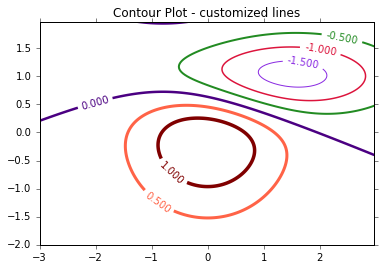

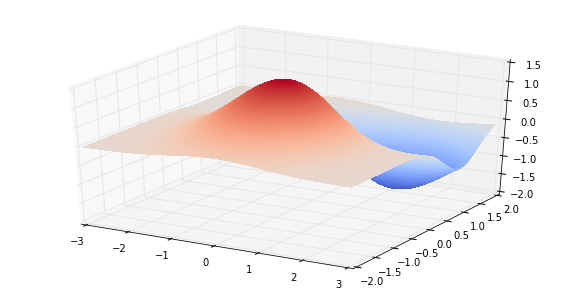

In [94]:
manual_locations = [(-1, -1.4), (-0.62, -0.7), (-2, 0.5), 
                    (1.7, 1.2), (2.0, 1.4), (2.4, 1.7)]

line_colours = ('BlueViolet', 'Crimson', 'ForestGreen', 
        'Indigo', 'Tomato', 'Maroon')

line_widths = (1, 1.5, 2, 2.5, 3, 3.5)
CS = plt.contour(X, Y, Z, 6,                       # add 6 contour lines
                 linewidths=line_widths,            # line widths
                 colors = line_colours)             # line colours

plt.clabel(CS, inline=1,                            # add labels
          fontsize=10,                             # label font size 
          manual=manual_locations)                 # label locations
plt.title('Contour Plot - customized lines')        # title

fig = plt.figure(figsize = (10, 5))
ax2 = fig.gca(projection = '3d')
ax2.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap = cm.coolwarm,
                linewidth=0, antialiased=False)

**Now lets just analyse whats going on here** 

First we simply plotted the contour plot according to the above steps but most of us don't know how to read one. Below I have plotted the same plot but in 3D. The contour plots are a better way of analysing a 3 dimentional plot in 2 dimentions. The rings or "levels" which we like to call, are the locus of the (x, y) points which yeild the same z. Read the previous line again and look at the 3 dimentional plot. It'll become clear. Thats it. This is how your read. And important to mention the center point might represent a local minima or a local maxima.

/usr/local/lib/python3.5/site-packages/matplotlib/contour.py:919: UserWarning: linewidths is ignored by contourf
  warnings.warn('linewidths is ignored by contourf')


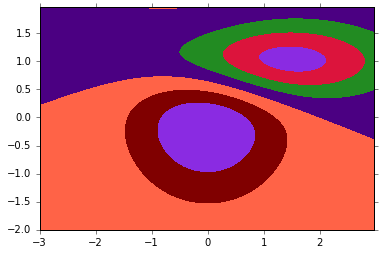

In [96]:
#Now lets color it up 
plt.contourf(X, Y, Z, 6,                       # add 6 contour lines
                 linewidths=line_widths,            # line widths
                 colors = line_colours)

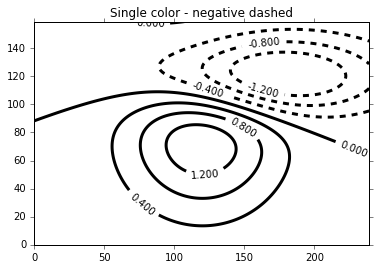

In [98]:
#now lets manually decide the levels
levels = np.arange(-1.2, 1.6, 0.4)              # contour levels
matplotlib.rcParams['contour.negative_linestyle'] = 'dashed'
CS = plt.contour(Z, levels,                     # levels lot plot
                 colors='black',                # lines colour 
                 linewidths=3                   # line widths
                 )
plt.clabel(CS, fontsize=10, inline=1)           # labels
plt.title('Single color - negative dashed')
#cool right... the more you enhance the plot, the better you can visualise.

### Adding a colorbar

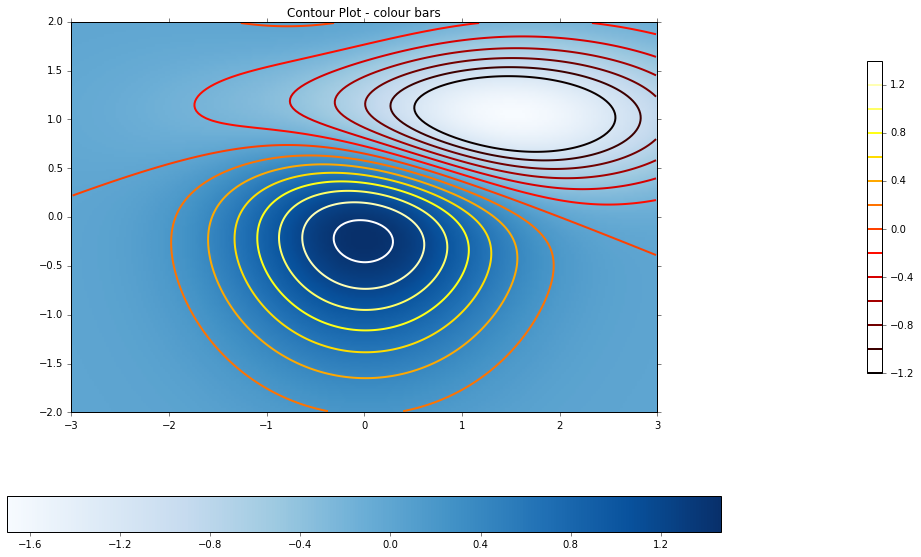

In [102]:
plt.figure(figsize = (20, 10))

plt.hot()                                    # set 'hot' as default colour map
im = plt.imshow(Z, interpolation='bilinear', # creates background image
                origin='lower', cmap=cm.Blues, 
                extent=(-3,3,-2,2))

levels = np.arange(-1.2, 1.6, 0.2)           # levels

CS = plt.contour(Z, levels,
                 origin='lower',             # origin in lower-left corner
                 linewidths=2,               # line width
                 extent=(-3,3,-2,2))         # outer pixel boundaries

CB = plt.colorbar(CS, shrink=0.8,                 # vertical colour bar
                  extend='both')

CBI = plt.colorbar(im, orientation='horizontal',  # horizontal colour bar
             shrink=0.8)

l,b,w,h = plt.gca().get_position().bounds
ll,bb,ww,hh = CB.ax.get_position().bounds
CB.ax.set_position([ll, b+0.1*h, ww, h*0.8])      # shrinks the vertical bar

plt.title('Contour Plot - colour bars')           # title

plt.show()